In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import nltk
import re
import string 
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem.lancaster import LancasterStemmer

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/thunderbolt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [4]:
data = pd.read_csv('jigsaw-toxic-comment-train.csv')
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223549 entries, 0 to 223548
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             223549 non-null  object
 1   comment_text   223549 non-null  object
 2   toxic          223549 non-null  int64 
 3   severe_toxic   223549 non-null  int64 
 4   obscene        223549 non-null  int64 
 5   threat         223549 non-null  int64 
 6   insult         223549 non-null  int64 
 7   identity_hate  223549 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 13.6+ MB


In [6]:
def valueCount(data, label):
    return data[label].value_counts()

In [7]:
print(valueCount(data, 'toxic'))
print(valueCount(data, 'severe_toxic'))
print(valueCount(data, 'obscene'))
print(valueCount(data, 'threat'))
print(valueCount(data, 'insult'))
print(valueCount(data, 'identity_hate'))

0    202165
1     21384
Name: toxic, dtype: int64
0    221587
1      1962
Name: severe_toxic, dtype: int64
0    211409
1     12140
Name: obscene, dtype: int64
0    222860
1       689
Name: threat, dtype: int64
0    212245
1     11304
Name: insult, dtype: int64
0    221432
1      2117
Name: identity_hate, dtype: int64


In [8]:
data['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [9]:
data['comment_text'][2]

"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."

### dataset is  imbananced

In [10]:
data_count = data.iloc[:,2:].sum()
data_count

toxic            21384
severe_toxic      1962
obscene          12140
threat             689
insult           11304
identity_hate     2117
dtype: int64

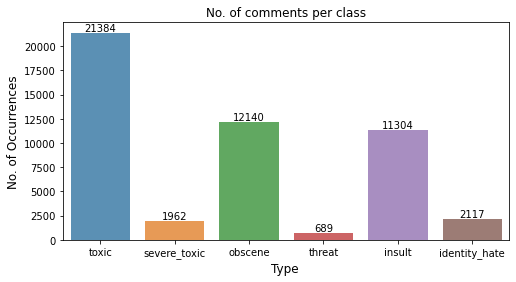

In [11]:
# Plot a chart with the following size
plt.figure(figsize=(8,4))

# Plot a bar chart using the index (category values) and the count of each category. alpha = 0.8 to make the bars more translucent
ax = sns.barplot(data_count.index, data_count.values, alpha=0.8)

plt.title("No. of comments per class")
plt.ylabel('No. of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)

#adding the text labels for each bar
rects = ax.patches
labels = data_count.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [12]:
num_rows = len(data)
print(num_rows)

223549


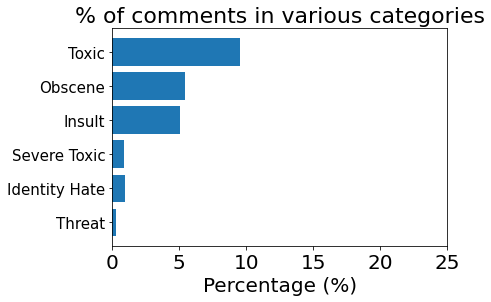

In [13]:
# Create a bar graph 
sum_tox = data['toxic'].sum() / num_rows * 100
sum_sev = data['severe_toxic'].sum() / num_rows * 100
sum_obs = data['obscene'].sum() / num_rows * 100
sum_thr = data['threat'].sum() / num_rows * 100
sum_ins = data['insult'].sum() / num_rows * 100
sum_ide = data['identity_hate'].sum() / num_rows * 100

# Initiate a list of 6 values that represent the 6 x-axis values for the categories
ind = np.arange(6)

# Let the ind variable be the x-axis, whereas the % of toxicity for each category be the y-axis.
# Sequence of % have been sorted manually. This method cannot be done if there are large numbers of categories.
ax = plt.barh(ind, [sum_tox, sum_obs, sum_ins, sum_sev, sum_ide, sum_thr])
plt.xlabel('Percentage (%)', size=20)
plt.xticks(np.arange(0, 30, 5), size=20)
plt.title('% of comments in various categories', size=22)
plt.yticks(ind, ('Toxic', 'Obscene', 'Insult', 'Severe Toxic', 'Identity Hate', 'Threat', ), size=15)

# Invert the graph so that it is in descending order.
plt.gca().invert_yaxis()
plt.show()


In [14]:
# Text preprocessing steps - remove numbers, capital letters, punctuation, '\n'
import re
import string

# remove all numbers with letters attached to them
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

# '[%s]' % re.escape(string.punctuation),' ' - replace punctuation with white space
# .lower() - convert all strings to lowercase 
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

# Remove all '\n' in the string and replace it with a space
remove_n = lambda x: re.sub("\n", " ", x)

# Remove all non-ascii characters 
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

# Apply all the lambda functions wrote previously through .map on the comments column
data['comment_text'] = data['comment_text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

data['comment_text'][0]

'explanation why the edits made under my username hardcore metallica fan were reverted  they weren t vandalisms  just closure on some gas after i voted at new york dolls fac  and please don t remove the template from the talk page since i m retired now        '

In [15]:
data_tox = data.loc[:,['comment_text','toxic']]

In [16]:
data_sev = data.loc[:,['comment_text','severe_toxic']]

In [17]:
data_obs = data.loc[:,['comment_text','obscene']]

In [18]:
data_thr = data.loc[:,['comment_text','threat']]

In [19]:
data_ins = data.loc[:,['comment_text','insult']]

In [20]:
data_ide = data.loc[:,['comment_text','identity_hate']]

In [21]:
data_tox['comment_text'][0]

'explanation why the edits made under my username hardcore metallica fan were reverted  they weren t vandalisms  just closure on some gas after i voted at new york dolls fac  and please don t remove the template from the talk page since i m retired now        '

In [22]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

In [23]:
def wordcloud(df, label):
    
    # Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
    subset=df[df[label]==1]
    text=subset.comment_text.values
    wc= WordCloud(background_color="black",max_words=4000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

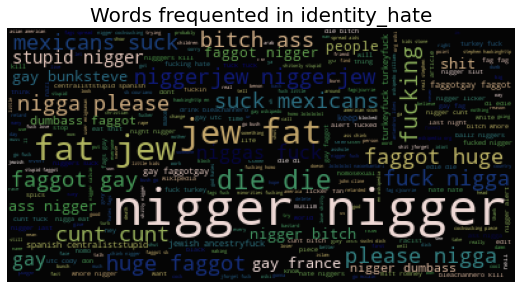

In [24]:
wordcloud(data_ide,'identity_hate')

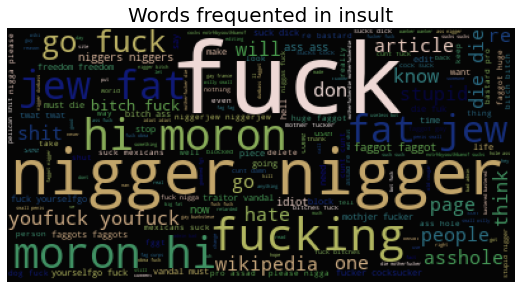

In [25]:
wordcloud(data_ins, 'insult')

In [26]:
data_tox.head()

,comment_text,toxic
0,explanation why the edits made under my userna...,0
1,d aww he matches this background colour i m s...,0
2,hey man i m really not trying to edit war it...,0
3,more i can t make any real suggestions on im...,0
4,you sir are my hero any chance you remember...,0


In [27]:
print(valueCount(data, 'toxic'))
print(valueCount(data, 'severe_toxic'))
print(valueCount(data, 'obscene'))
print(valueCount(data, 'threat'))
print(valueCount(data, 'insult'))
print(valueCount(data, 'identity_hate'))

0    202165
1     21384
Name: toxic, dtype: int64
0    221587
1      1962
Name: severe_toxic, dtype: int64
0    211409
1     12140
Name: obscene, dtype: int64
0    222860
1       689
Name: threat, dtype: int64
0    212245
1     11304
Name: insult, dtype: int64
0    221432
1      2117
Name: identity_hate, dtype: int64


In [28]:
data_tox.head()

,comment_text,toxic
0,explanation why the edits made under my userna...,0
1,d aww he matches this background colour i m s...,0
2,hey man i m really not trying to edit war it...,0
3,more i can t make any real suggestions on im...,0
4,you sir are my hero any chance you remember...,0


In [29]:
data_tox_1 = data_tox[data_tox['toxic'] == 1].iloc[0:21384,:]
data_tox_1.shape

(21384, 2)

In [30]:
data_tox_0 = data_tox[data_tox['toxic'] == 0].iloc[0:21500,:]
data_tox_0.shape

(21500, 2)

In [31]:
data_tox_done = pd.concat([data_tox_1, data_tox_0], axis=0)
data_tox_done.shape

(42884, 2)

In [32]:
data_tox_done['toxic'].value_counts()

0    21500
1    21384
Name: toxic, dtype: int64

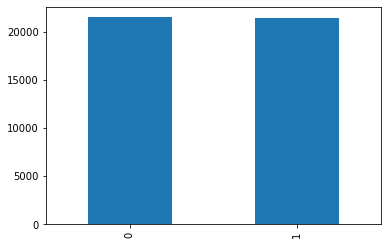

In [33]:
data_tox_done['toxic'].value_counts().plot(kind='bar')

In [34]:
data_sev_1 = data_sev[data_sev['severe_toxic'] == 1].iloc[0:1962,:]
data_sev_0 = data_sev[data_sev['severe_toxic'] == 0].iloc[0:1962,:]
data_sev_done = pd.concat([data_sev_1, data_sev_0], axis=0)
data_sev_done.shape

(3924, 2)

In [35]:
data_obs_1 = data_obs[data_obs['obscene'] == 1].iloc[0:12140,:]
data_obs_0 = data_obs[data_obs['obscene'] == 0].iloc[0:12100,:]
data_obs_done = pd.concat([data_obs_1, data_obs_0], axis=0)
data_obs_done.shape

(24240, 2)

In [36]:
data_thr_1 = data_thr[data_thr['threat'] == 1].iloc[0:689,:]
data_thr_0 = data_thr[data_thr['threat'] == 0].iloc[0:1000,:]  
data_thr_done = pd.concat([data_thr_1, data_thr_0], axis=0)
data_thr_done.shape

(1689, 2)

In [37]:
data_ins_1 = data_ins[data_ins['insult'] == 1].iloc[0:11304,:]
data_ins_0 = data_ins[data_ins['insult'] == 0].iloc[0:11300,:]
data_ins_done = pd.concat([data_ins_1, data_ins_0], axis=0)
data_ins_done.shape

(22604, 2)

In [38]:
data_ide_1 = data_ide[data_ide['identity_hate'] == 1].iloc[0:2117,:] # 20%
data_ide_0 = data_ide[data_ide['identity_hate'] == 0].iloc[0:3000,:] # 80%
data_ide_done = pd.concat([data_ide_1, data_ide_0], axis=0)
data_ide_done.shape

(5117, 2)

In [39]:
# Import packages for pre-processing
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel

# Import tools to split data and evaluate model performance
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

# Import ML algos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier


In [40]:
'''
df_done: data_tox_done, data_sev_done, ...
label: toxic, severe_toxic, ...
vectorizer values: CountVectorizer, TfidfVectorizer
gram_range values: (1,1) for unigram, (2,2) for bigram
'''
def cv_tf_train_test(df_done,label,vectorizer,ngram):

    ''' Train/Test split'''
    # Split the data into X and y data sets
    X = df_done.comment_text
    y = df_done[label]

    # Split our data into training and test data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    ''' Count Vectorizer/TF-IDF '''

    # Create a Vectorizer object and remove stopwords from the table
    cv1 = vectorizer(ngram_range=(ngram), stop_words='english')
    
    X_train_cv1 = cv1.fit_transform(X_train) # Learn the vocabulary dictionary and return term-document matrix
    X_test_cv1  = cv1.transform(X_test)      # Learn a vocabulary dictionary of all tokens in the raw documents.
    
    # Output a Dataframe of the CountVectorizer with unique words as the labels
    # test = pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names())
        
    ''' Initialize all model objects and fit the models on the training data '''
    lr = LogisticRegression()
    lr.fit(X_train_cv1, y_train)
    print('lr done')

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_cv1, y_train)

    bnb = BernoulliNB()
    bnb.fit(X_train_cv1, y_train)
    print('bnb done')
    
    mnb = MultinomialNB()
    mnb.fit(X_train_cv1, y_train)
    print('mnb done')
    
    svm_model = LinearSVC()
    svm_model.fit(X_train_cv1, y_train)

    randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
    randomforest.fit(X_train_cv1, y_train)
    print('rdf done')
    
    # Create a list of F1 score of all models 
    f1_score_data = {'F1 Score':[f1_score(lr.predict(X_test_cv1), y_test),
                                 f1_score(knn.predict(X_test_cv1), y_test), 
                                 f1_score(bnb.predict(X_test_cv1), y_test),
                                 f1_score(mnb.predict(X_test_cv1), y_test),
                                 f1_score(svm_model.predict(X_test_cv1), y_test),                                      f1_score(randomforest.predict(X_test_cv1), y_test)]} 
                          
    # Create DataFrame with the model names as column labels
    df_f1 = pd.DataFrame(f1_score_data, index=['Log Regression','KNN', 'BernoulliNB',                          'MultinomialNB', 'SVM', 'Random Forest'])  

    return df_f1

In [41]:
'''
def cv_tf_train_test(df_done,label,vectorizer,ngram)
vectorizer values: CountVectorizer, TfidfVectorizer
ngram_range values: (1,1) for unigram, (2,2) for bigram
'''

import time

t0 = time.time()

df_tox_cv = cv_tf_train_test(data_tox_done, 'toxic', TfidfVectorizer, (1,1))
df_tox_cv.rename(columns={'F1 Score': 'F1 Score(toxic)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_tox_cv

lr done
bnb done
mnb done
rdf done
Time taken: 100.90879249572754 seconds


,F1 Score(toxic)
Log Regression,0.900129
KNN,0.475433
BernoulliNB,0.774483
MultinomialNB,0.882672
SVM,0.905964
Random Forest,0.863644


In [42]:

t0 = time.time()

df_sev_cv = cv_tf_train_test(data_sev_done, 'severe_toxic', TfidfVectorizer, (1,1))
df_sev_cv.rename(columns={'F1 Score': 'F1 Score(severe_toxic)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)
df_sev_cv

lr done
bnb done
mnb done
rdf done
Time taken: 2.7662601470947266 seconds


,F1 Score(severe_toxic)
Log Regression,0.932633
KNN,0.879936
BernoulliNB,0.815331
MultinomialNB,0.936833
SVM,0.937446
Random Forest,0.931364


In [43]:

t0 = time.time()

df_obs_cv = cv_tf_train_test(data_obs_done, 'obscene', TfidfVectorizer, (1,1))
df_obs_cv.rename(columns={'F1 Score': 'F1 Score(obscene)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_obs_cv

lr done
bnb done
mnb done
rdf done
Time taken: 35.230332136154175 seconds


,F1 Score(obscene)
Log Regression,0.925947
KNN,0.476273
BernoulliNB,0.788110
MultinomialNB,0.902233
SVM,0.936014
Random Forest,0.915691


In [44]:

t0 = time.time()

df_thr_cv = cv_tf_train_test(data_thr_done, 'threat', TfidfVectorizer, (1,1))
df_thr_cv.rename(columns={'F1 Score': 'F1 Score(threat)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_thr_cv

lr done
bnb done
mnb done
rdf done
Time taken: 1.128788709640503 seconds


,F1 Score(threat)
Log Regression,0.849604
KNN,0.750685
BernoulliNB,0.824458
MultinomialNB,0.921951
SVM,0.904645
Random Forest,0.914005


In [45]:
t0 = time.time()

df_ins_cv = cv_tf_train_test(data_ins_done, 'insult', TfidfVectorizer, (1,1))
df_ins_cv.rename(columns={'F1 Score': 'F1 Score(insult)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_ins_cv

lr done
bnb done
mnb done
rdf done
Time taken: 31.811132669448853 seconds


,F1 Score(insult)
Log Regression,0.910107
KNN,0.459123
BernoulliNB,0.796948
MultinomialNB,0.899486
SVM,0.917188
Random Forest,0.898529


In [46]:

t0 = time.time()

df_ide_cv = cv_tf_train_test(data_ide_done, 'identity_hate', TfidfVectorizer, (1,1))
df_ide_cv.rename(columns={'F1 Score': 'F1 Score(identity_hate)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_ide_cv

lr done
bnb done
mnb done
rdf done
Time taken: 3.747821807861328 seconds


,F1 Score(identity_hate)
Log Regression,0.877023
KNN,0.327411
BernoulliNB,0.785938
MultinomialNB,0.879173
SVM,0.912500
Random Forest,0.884161


In [47]:
# Let's combine the dataframes into a master dataframe to compare F1 scores across all categories.
f1_all = pd.concat([df_tox_cv, df_sev_cv, df_obs_cv, df_ins_cv, df_thr_cv, df_ide_cv], axis=1)
f1_all


,F1 Score(toxic),F1 Score(severe_toxic),F1 Score(obscene),F1 Score(insult),F1 Score(threat),F1 Score(identity_hate)
Log Regression,0.900129,0.932633,0.925947,0.910107,0.849604,0.877023
KNN,0.475433,0.879936,0.476273,0.459123,0.750685,0.327411
BernoulliNB,0.774483,0.815331,0.788110,0.796948,0.824458,0.785938
MultinomialNB,0.882672,0.936833,0.902233,0.899486,0.921951,0.879173
SVM,0.905964,0.937446,0.936014,0.917188,0.904645,0.912500
Random Forest,0.863644,0.931364,0.915691,0.898529,0.914005,0.884161


In [48]:
f1_all_trp = f1_all.transpose()
f1_all_trp

,Log Regression,KNN,BernoulliNB,MultinomialNB,SVM,Random Forest
F1 Score(toxic),0.900129,0.475433,0.774483,0.882672,0.905964,0.863644
F1 Score(severe_toxic),0.932633,0.879936,0.815331,0.936833,0.937446,0.931364
F1 Score(obscene),0.925947,0.476273,0.788110,0.902233,0.936014,0.915691
F1 Score(insult),0.910107,0.459123,0.796948,0.899486,0.917188,0.898529
F1 Score(threat),0.849604,0.750685,0.824458,0.921951,0.904645,0.914005
F1 Score(identity_hate),0.877023,0.327411,0.785938,0.879173,0.912500,0.884161


Text(0.5, 1.0, 'F1 Score of ML models (TF-IDF)')

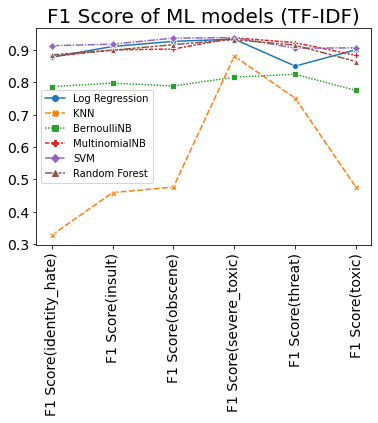

In [49]:
sns.lineplot(data=f1_all_trp, size=[10,10], markers=True)
plt.xticks(rotation='90', fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best')
plt.title('F1 Score of ML models (TF-IDF)', fontsize=20)


In [50]:
from sklearn.calibration import CalibratedClassifierCV

X = data_tox_done.comment_text
y = data_tox_done['toxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initiate a Tfidf vectorizer
tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')

X_train_fit = tfv.fit_transform(X_train)  # Convert the X data into a document term matrix dataframe
X_test_fit = tfv.transform(X_test)  # Converts the X_test comments into Vectorized format

svm_model = LinearSVC()
clf = CalibratedClassifierCV(svm_model)

randomforest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train our SVM model with the X training data converted into Count Vectorized format with the Y training data
clf.fit(X_train_fit, y_train)
clf.predict(X_test_fit)
print("SVM done")

randomforest.fit(X_train_fit, y_train)
randomforest.predict(X_test_fit)
print("Random forest done.")

SVM done
Random forest done.


In [51]:
data_tox_done.head()

,comment_text,toxic
6,cocksucker before you piss around on my work,1
12,hey what is it talk what is it a...,1
16,bye don t look come or think of comming ba...,1
42,you are gay or antisemmitian archangel whit...,1
43,fuck your filthy mother in the ass dry,1


In [52]:
# Sample Prediction
# Sample Prediction
comment1 = ['You piece of shit']
comment2 = ['What is up garden apple doing']

comment1_vect = tfv.transform(comment1)
clf.predict_proba(comment1_vect)[:,1]

array([0.99999978])

In [53]:
comment2_vect = tfv.transform(comment2)
clf.predict_proba(comment2_vect)[:,1]

array([0.15388404])

In [54]:
randomforest.predict_proba(comment1_vect)[:,1]

array([1.])

In [55]:
randomforest.predict_proba(comment2_vect)[:,1]

array([0.40146201])

In [56]:
data_tox_done.head()

,comment_text,toxic
6,cocksucker before you piss around on my work,1
12,hey what is it talk what is it a...,1
16,bye don t look come or think of comming ba...,1
42,you are gay or antisemmitian archangel whit...,1
43,fuck your filthy mother in the ass dry,1


In [57]:
hindi_data = pd.read_csv('Hindi.csv', names=['comment_text', 'toxic'])
hindi_data.head()

,comment_text,toxic
0,aand aandu,NaN
1,aandu,NaN
2,balatkar,NaN
3,beti chod,NaN
4,bhadve,NaN


In [58]:
hindi_data['toxic'] = hindi_data['toxic'].fillna(1)

In [59]:
hindi_data['toxic'] = hindi_data['toxic'].apply(np.int64)

In [60]:
hindi_data.head()

,comment_text,toxic
0,aand aandu,1
1,aandu,1
2,balatkar,1
3,beti chod,1
4,bhadve,1


In [61]:
data_tox_done.shape

(42884, 2)

In [62]:
hindi_data_tox_done = pd.concat([data_tox_done, hindi_data], axis=0)

In [63]:
hindi_data_tox_done.shape

(43139, 2)

In [64]:
hindi_data_tox_done = hindi_data_tox_done.sample(frac=1)

In [65]:
hindi_data_tox_done.head()

,comment_text,toxic
4410,also in szabolcs k kay,0
1616,i changed the date from to the reference ...,0
10258,reviewing your sources msm in africa ...,0
20159,elaich i have learned my lesson from now on ...,0
7396,olly murs please discuss splitting off a sep...,0


In [66]:
hindi_data_tox_done[hindi_data_tox_done['comment_text']=='aandu']

,comment_text,toxic
1,aandu,1
131,aandu,1


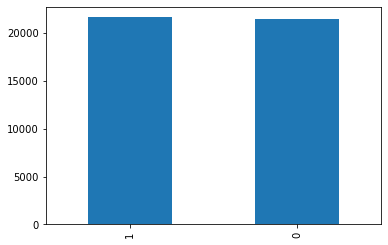

In [67]:
%matplotlib inline
hindi_data_tox_done['toxic'].value_counts().plot(kind='bar')

In [68]:
'''
def cv_tf_train_test(df_done,label,vectorizer,ngram)
vectorizer values: CountVectorizer, TfidfVectorizer
ngram_range values: (1,1) for unigram, (2,2) for bigram
'''

import time

t0 = time.time()

df_tox_cv = cv_tf_train_test(hindi_data_tox_done, 'toxic', TfidfVectorizer, (1,1))
df_tox_cv.rename(columns={'F1 Score': 'F1 Score(toxic)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_tox_cv

lr done
bnb done
mnb done
rdf done
Time taken: 94.86101698875427 seconds


,F1 Score(toxic)
Log Regression,0.903532
KNN,0.483287
BernoulliNB,0.780987
MultinomialNB,0.885808
SVM,0.907668
Random Forest,0.866074


In [69]:
X = hindi_data_tox_done.comment_text
y = hindi_data_tox_done['toxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initiate a Tfidf vectorizer
tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')

X_train_fit = tfv.fit_transform(X_train)  # Convert the X data into a document term matrix dataframe
X_test_fit = tfv.transform(X_test)  # Converts the X_test comments into Vectorized format

svm_model = LinearSVC()
clf = CalibratedClassifierCV(svm_model)

randomforest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train our SVM model with the X training data converted into Count Vectorized format with the Y training data
clf.fit(X_train_fit, y_train)
clf.predict(X_test_fit)
print("SVM done")

randomforest.fit(X_train_fit, y_train)
randomforest.predict(X_test_fit)
print("Random forest done.")

SVM done
Random forest done.


In [70]:
# Sample Prediction
comment3 = ['jhaatu']
comment4 = ['What is up garden apple doing']


comment3_vect = tfv.transform(comment3)
clf.predict_proba(comment3_vect)[:,1]

array([0.89885365])

In [71]:
import pickle
'''
NOTE: This step has already been done for you. The pickled files are included in the github. Just for further reference.
You do NOT have to run this cell.
'''

def pickle_model(df, label):
    
    X = df.comment_text
    y = df[label]

    # Initiate a Tfidf vectorizer
    tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
    
    # Convert the X data into a document term matrix dataframe
    X_vect = tfv.fit_transform(X)  
    
    # saves the column labels (ie. the vocabulary)
    # wb means Writing to the file in Binary mode, written in byte objects
    with open(r"{}.pkl".format(label + '_vect'), "wb") as f:   
        pickle.dump(tfv, f)   
        
    svm_model = LinearSVC()
    clf = CalibratedClassifierCV(svm_model)
    clf.fit(X_vect, y)

    # Create a new pickle file based on random forest
    with open(r"{}.pkl".format(label + '_model'), "wb") as f:  
        pickle.dump(clf, f)

In [72]:
'''
OPTIONAL STEP. Pickled file already available on Github.
'''
datalist = [hindi_data_tox_done, data_sev_done, data_obs_done, data_ins_done, data_thr_done, data_ide_done]
label = ['toxic', 'severe_toxic', 'obscene', 'insult', 'threat', 'identity_hate']

for i,j in zip(datalist,label):
    pickle_model(i, j)
    
